# Proyecto: Aplicación de análisis PCA para reconstrucción de imágenes usando menos variables de las que tiene el dataset original

### * El dataset consta de 400 imágenes (variables) correspondientes 40 personas (10 imágenes por persona)

### * El objetivo es reconstruir el 95% del dataset original usando menos de la mitad ( < 400 ) del número de imágenes disponibles

In [1]:
%matplotlib inline

import numpy as np 
import imageio 
import matplotlib.pyplot as plt 
import pandas as pd 

# librería para análisis PCA
from sklearn.decomposition import PCA

# libreria para manipular directorios
from glob import iglob 

## Exploramos los datos:

In [2]:
# Cargamos una sóla imagen:
im = imageio.imread('./Data/imagenes_rostros/s3/3.pgm')
im = im.astype(np.uint8)
im.shape

(112, 92)

In [3]:
# Normalizamos la matriz de pixeles:
im = im / np.max(im)

# Extraemos numero de pixeles en dirección vertical y horizontal:
nz, nx = im.shape

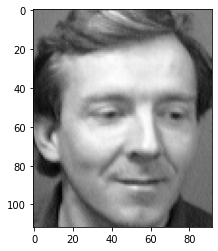

In [4]:
# Graficamos la matriz de pixeles
plt.imshow(im, cmap='gray') 
plt.show()

In [5]:
# Cargamos todas las imagenes:
data_caras = pd.DataFrame([])

for path in iglob('./Data/imagenes_rostros/*/*.pgm'):
    im = imageio.imread(path)
    im = im.flatten() # <--- pasamos la matriz de pixeles a un vector 
    cara_i = pd.Series(im , name=path)
    data_caras = data_caras.append(cara_i)

data_caras.shape

(400, 10304)

In [6]:
# Extraemos numero de caras y numero de pixeles por cada cara:
n_caras , n_pixels_cara = data_caras.shape

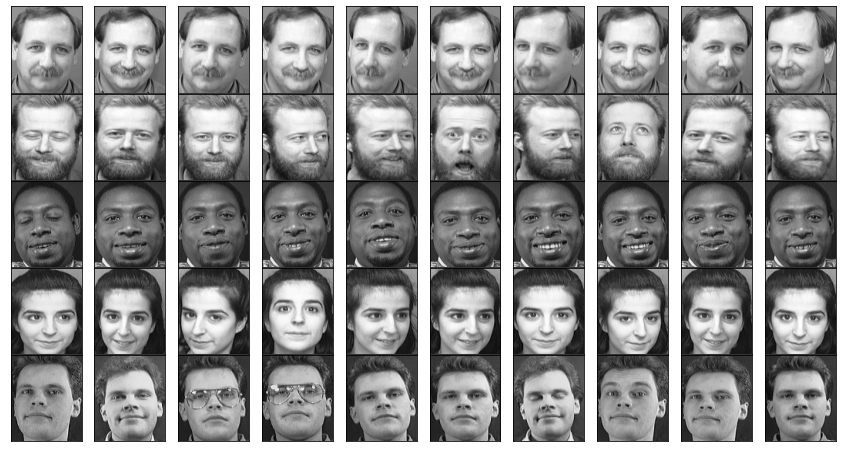

In [7]:
# Graficamos un conjunto de caras:

# Configuramos espacios de graficación:
fig , axes = plt.subplots(5 , 10 , figsize = (15,8),
    subplot_kw= {'xticks':[] , 'yticks':[] }, # <-- elimina los numeros de los ejes  
    gridspec_kw = {'hspace':0.01 , 'wspace':0.01} ) # <-- define espacios vertical y horizontal 

for i, ax in enumerate(axes.flat):
    ax.imshow(data_caras.iloc[i].values.reshape(nz, nx) , cmap='gray')

## Inicia análisis PCA:

In [8]:

# porcentaje de información a explicar con menos variables:
p = 0.95
# OBSERVACIÓN: 
# * Si "p" es un numero entre 0 y 1, este indicará porcentaje de información
# * Si "p" es un numero entero, este indicará número de componentes principales

# Declaramos la función PCA:
pca_meth = PCA( n_components = p )

# Aplicamos PCA a los datos numéricos
pca_meth.fit( data_caras )

PCA(n_components=0.95)

In [9]:
# Extraemos número de componentes principales que explican el porcentaje de los datos:
nc_pca = pca_meth.n_components_

print('En total hay ',n_caras,'caras, sin embargo,')
print('Para preservar el',p*100,'% de la infromación sólo se requieren',nc_pca,'componentes principales')

En total hay  400 caras, sin embargo,
Para preservar el 95.0 % de la infromación sólo se requieren 190 componentes principales


In [10]:
# Extraemos las componentes de la transformación [W] (de k x p) que lleva el dataset original
# de "p" variables a un dataset reducido de "k" componentes principales (con k < p). 

W = pca_meth.components_
W.shape

(190, 10304)

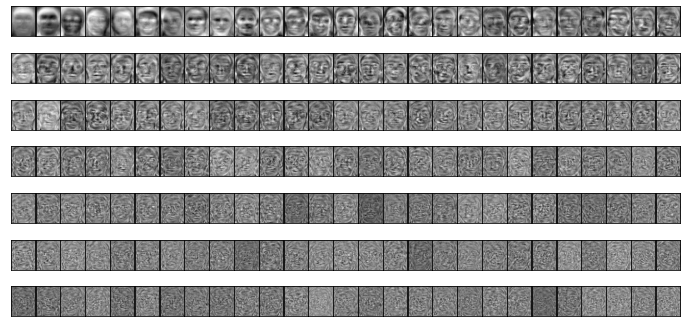

In [11]:
# Graficamos componentes principales que explican el porcentaje de datos requerido:

# Definimos renglones y columnas para el grafico
renglones = 7
columnas = ( nc_pca ) // (renglones) # // <-- división entera 

# Configuramos espacios de graficación:
fig , axes = plt.subplots(renglones , columnas , figsize = (12,6),
    subplot_kw= {'xticks':[] , 'yticks':[] }, # <-- elimina los numeros de los ejes  
    gridspec_kw = {'hspace':0.01 , 'wspace':0.01} ) # <-- define espacios vertical y horizontal 

for i, ax in enumerate(axes.flat):
    ax.imshow(W[i].reshape(nz, nx) , cmap='gray')

## Proyectamos el dataset original al espacio de componentes principales (de menor dimensión):

In [12]:
# Obtenemos la transformación de los datos en el espacio de componentes principales
data_caras_pca = pca_meth.transform( data_caras )
data_caras_pca.shape

(400, 190)

## Aplicamos transformación inversa para llevar los datos: del espacio de componentes principales al espacio del dataset original

In [13]:
# Datos recuperados a partir de las componetes principales:
data_caras_aprox = pca_meth.inverse_transform(data_caras_pca)
data_caras_aprox.shape

(400, 10304)

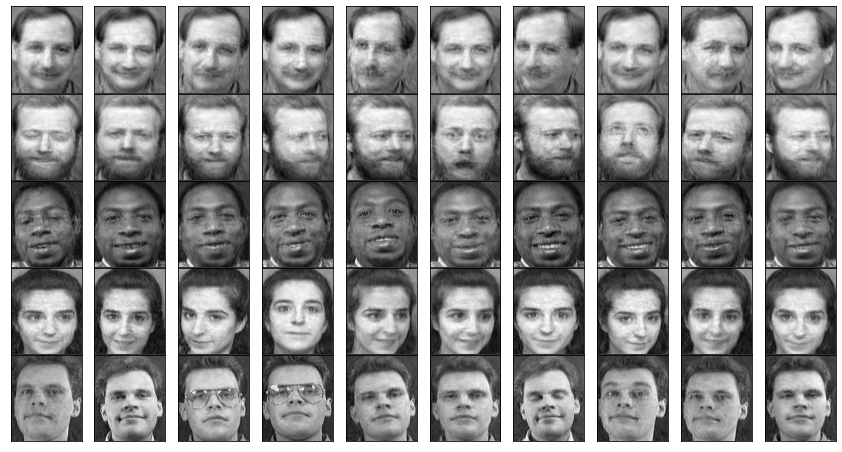

In [14]:
# Graficamos el conjunto de caras reconstruidas a partir de las componentes principales:

# Configuramos espacios de graficación:
fig , axes = plt.subplots(5 , 10 , figsize = (15,8),
    subplot_kw= {'xticks':[] , 'yticks':[] }, # <-- elimina los numeros de los ejes  
    gridspec_kw = {'hspace':0.01 , 'wspace':0.01} ) # <-- define espacios vertical y horizontal 

for i, ax in enumerate(axes.flat):
    ax.imshow(data_caras_aprox[i].reshape(nz, nx) , cmap='gray')